In [ ]:
import pandas as pd
import mysql.connector 
import plotly.express as px
import requests
import json

In [ ]:
sqlconn = mysql.connector.connect(
        host="localhost",
        user="root",
        password="root",
        database = "phonepe_data")
cursor = sqlconn.cursor()

#Taking aggregated_insurance_df
cursor.execute("select * from aggregated_insurance")
table1 = cursor.fetchall()
sqlconn.commit()

Aggregated_insurance = pd.DataFrame(table1,columns=("States","Years","Quarter","Transaction_type",
                                                    "Transaction_count","Transaction_amount"))

#Taking aggregated_transaction_df
cursor.execute("select * from aggregated_transaction")
table2 = cursor.fetchall()
sqlconn.commit()

Aggregated_transaction = pd.DataFrame(table2,columns=("States","Years","Quarter","Transaction_type",
                                                    "Transaction_count","Transaction_amount"))

#Taking aggregated_user_df
cursor.execute("select * from aggregated_user")
table3 = cursor.fetchall()
sqlconn.commit()

Aggregated_user = pd.DataFrame(table3,columns=("States","Years","Quarter","Brands",
                                                    "Transaction_count","Percentage"))

In [ ]:
Aggregated_insurance

In [ ]:
#Taking map_insurance_df
cursor.execute("select * from map_insurance")
table4 = cursor.fetchall()
sqlconn.commit()

Map_insurance = pd.DataFrame(table4,columns=("States","Years","Quarter","District",
                                                    "Transaction_count","Transaction_amount"))

#Taking map_transaction_df
cursor.execute("select * from map_transaction")
table5 = cursor.fetchall()
sqlconn.commit()

Map_transaction = pd.DataFrame(table5,columns=("States","Years","Quarter","District",
                                                    "Transaction_count","Transaction_amount"))

#Taking map_user_df
cursor.execute("select * from map_insurance")
table6 = cursor.fetchall()
sqlconn.commit()

Map_user = pd.DataFrame(table6,columns=("States","Years","Quarter","District",
                                                    "RegisteredUser","AppOpens"))

In [ ]:
Map_user

In [ ]:
#Taking top_insurance_df
cursor.execute("select * from top_insurance")
table7 = cursor.fetchall()
sqlconn.commit()

Top_insurance = pd.DataFrame(table7,columns=("States","Years","Quarter","Pincodes",
                                                    "Transaction_count","Transaction_amount"))

#Taking top_transaction_df
cursor.execute("select * from top_transaction")
table8 = cursor.fetchall()
sqlconn.commit()

Top_transaction = pd.DataFrame(table8,columns=("States","Years","Quarter","Pincodes",
                                                    "Transaction_count","Transaction_amount"))

#Taking top_user_df
cursor.execute("select * from top_user")
table9 = cursor.fetchall()
sqlconn.commit()

Top_user = pd.DataFrame(table9,columns=("States","Years","Quarter","Pincodes",
                                                    "RegisteredUser"))

In [ ]:
Top_transaction

In [ ]:
def top_chart_transaction_amount(table_name):
    sqlconn = mysql.connector.connect(
            host="localhost",
            user="root",
            password="root",
            database = "phonepe_data")
    cursor = sqlconn.cursor()
    
    
    # Top 10
    query1 = f'''select States,sum(Transaction_amount) as Transaction_amount from {table_name} 
                group by States
                order by Transaction_amount desc
                limit 10;'''
    cursor.execute(query1)
    table_1 = cursor.fetchall()
    sqlconn.commit()
    
    df_1 = pd.DataFrame(table_1, columns = ("States", "Transaction_amount"))

    fig_pie1 = px.pie(data_frame = df_1, names="States", values= "Transaction_amount",
                      width = 800, title= "TRANSACTION AMOUNT",hole=0.3)
    fig_pie1.show()
    '''
    fig_amount_1 = px.bar(df_1,x='States',y='Transaction_amount',title="TRANSACTION AMOUNT", hover_name = "States",
                        color_discrete_sequence=px.colors.sequential.Sunsetdark_r,height=500, width = 500)
    fig_amount_1.show()
    '''
    
    # Bottom 10
    query2 = f'''select States,sum(Transaction_amount) as Transaction_amount from {table_name} 
                group by States
                order by Transaction_amount 
                limit 10;'''
    cursor.execute(query2)
    table_2 = cursor.fetchall()
    sqlconn.commit()
    
    df_2 = pd.DataFrame(table_2, columns = ("States", "Transaction_amount"))
    
    fig_amount_2 = px.bar(df_2,x='States',y='Transaction_amount',title="TRANSACTION AMOUNT", hover_name = "States",
                        color_discrete_sequence=px.colors.sequential.Sunsetdark,height=500, width = 500)
    fig_amount_2.show()
    
    
    # Average
    query3 = f'''select States,avg(Transaction_amount) as Transaction_amount from {table_name} 
                group by States
                order by Transaction_amount;'''
    cursor.execute(query3)
    table_3 = cursor.fetchall()
    sqlconn.commit()
    
    df_3 = pd.DataFrame(table_3, columns = ("States", "Transaction_amount"))
    
    fig_amount_3 = px.bar(df_3,x='Transaction_amount',y='States',title="TRANSACTION AMOUNT", orientation = "h",
                          hover_name = "States", color_discrete_sequence=px.colors.sequential.Magenta,height=500, width = 500)
    fig_amount_3.show()

In [ ]:
top_chart_transaction_amount("aggregated_transaction")

In [ ]:
def top_chart_transaction_count(table_name):
    sqlconn = mysql.connector.connect(
            host="localhost",
            user="root",
            password="root",
            database = "phonepe_data")
    cursor = sqlconn.cursor()
    
    
    # Top 10
    query1 = f'''select States,sum(Transaction_count) as Transaction_count from {table_name} 
                group by States
                order by Transaction_count desc
                limit 10;'''
    cursor.execute(query1)
    table_1 = cursor.fetchall()
    sqlconn.commit()
    
    df_1 = pd.DataFrame(table_1, columns = ("States", "Transaction_count"))


    fig_pie1 = px.pie(data_frame = df_1, names="States", values= "Transaction_count",
                      width = 800, title= "TOP 10 TRANSACTION COUNT",hole=0.3)
    fig_pie1.show()
    
    #fig_amount_1 = px.bar(df_1,x='States',y='Transaction_count',title="TRANSACTION COUNT", hover_name = "States",
     #                   color_discrete_sequence=px.colors.sequential.Sunsetdark_r,height=500, width = 500)
    #fig_amount_1.show()
    
    
    # Bottom 10
    query2 = f'''select States,sum(Transaction_count) as Transaction_count from {table_name} 
                group by States
                order by Transaction_count 
                limit 10;'''
    cursor.execute(query2)
    table_2 = cursor.fetchall()
    sqlconn.commit()
    
    df_2 = pd.DataFrame(table_2, columns = ("States", "Transaction_count"))

    fig_pie2 = px.pie(data_frame = df_2, names="States", values= "Transaction_count",
                      width = 800, title= "LEAST 10 TRANSACTION COUNT",hole=0.3)
    fig_pie2.show()
    
    #fig_amount_2 = px.bar(df_2,x='States',y='Transaction_count',title="TRANSACTION COUNT", hover_name = "States",
    #                    color_discrete_sequence=px.colors.sequential.Sunsetdark,height=500, width = 500)
    #fig_amount_2.show()
    
    
    # Average
    query3 = f'''select States,avg(Transaction_count) as Transaction_count from {table_name} 
                group by States
                order by Transaction_count;'''
    cursor.execute(query3)
    table_3 = cursor.fetchall()
    sqlconn.commit()
    
    df_3 = pd.DataFrame(table_3, columns = ("States", "Transaction_count"))
  
    fig_amount_3 = px.bar(df_3,x='Transaction_count',y='States',title="AVERAGE TRANSACTION COUNT", orientation = "h",
                          hover_name = "States", color_discrete_sequence=px.colors.sequential.Magenta,height=500, width = 500)
    fig_amount_3.show()

In [ ]:
top_chart_transaction_count("aggregated_insurance")

In [ ]:
def top_chart_registered_user(table_name, state):
    sqlconn = mysql.connector.connect(
            host="localhost",
            user="root",
            password="root",
            database = "phonepe_data")
    cursor = sqlconn.cursor()
    
    
    # Top 10
    query1 = f'''select Districts, sum(RegisteredUser) as RegisteredUser from {table_name}
                where States= '{state}'
                group by Districts
                order by Registereduser desc
                limit 10;'''
    cursor.execute(query1)
    table_1 = cursor.fetchall()
    sqlconn.commit()
    
    df_1 = pd.DataFrame(table_1, columns = ("Districts", "RegisteredUser"))
    '''
    fig_pie1 = px.pie(data_frame = df_1, names="States", values= "Transaction_amount",
                      width = 800, title= "TRANSACTION AMOUNT",hole=0.3)
    fig_pie1.show()
    '''    
    fig_amount_1 = px.bar(df_1,x='Districts',y='RegisteredUser',title="TOP 10 REGISTERED USER", hover_name = "Districts",
                        color_discrete_sequence=px.colors.sequential.Sunsetdark_r,height=500, width = 500)
    fig_amount_1.show()
    
    
    # Bottom 10
    query2 = f'''select Districts, sum(RegisteredUser) as RegisteredUser from {table_name}
                where States= '{state}'
                group by Districts
                order by Registereduser
                limit 10;'''
    cursor.execute(query2)
    table_2 = cursor.fetchall()
    sqlconn.commit()
    
    df_2 = pd.DataFrame(table_2, columns = ("Districts", "RegisteredUser"))
    
    fig_amount_2 = px.bar(df_2,x='Districts',y='RegisteredUser',title="LEAST 10 REGISTERED USER", hover_name = "Districts",
                        color_discrete_sequence=px.colors.sequential.Sunsetdark,height=500, width = 500)
    fig_amount_2.show()
    
    
    # Average
    query3 = f'''select Districts, avg(RegisteredUser) as RegisteredUser from {table_name}
                where States= '{state}'
                group by Districts
                order by Registereduser;'''
    cursor.execute(query3)
    table_3 = cursor.fetchall()
    sqlconn.commit()
    
    df_3 = pd.DataFrame(table_3, columns = ("Districts", "RegisteredUser"))
    
    fig_amount_3 = px.bar(df_3,x='RegisteredUser',y='Districts',title="AVERAGE REGISTERED USER", orientation = "h",
                          hover_name = "Districts", color_discrete_sequence=px.colors.sequential.Magenta,height=500, width = 800)
    fig_amount_3.show()

In [ ]:
top_chart_registered_user("map_user", "Tamil Nadu")

In [ ]:
def top_chart_app_opens(table_name, state):
    sqlconn = mysql.connector.connect(
            host="localhost",
            user="root",
            password="root",
            database = "phonepe_data")
    cursor = sqlconn.cursor()
    
    
    # Top 10
    query1 = f'''select Districts, sum(AppOpens) as AppOpens from {table_name}
                where States= '{state}'
                group by Districts
                order by AppOpens desc
                limit 10;'''
    cursor.execute(query1)
    table_1 = cursor.fetchall()
    sqlconn.commit()
    
    df_1 = pd.DataFrame(table_1, columns = ("Districts", "AppOpens"))
        
    fig_amount_1 = px.bar(df_1,x='Districts',y='AppOpens',title="TOP 10 APP OPENS", hover_name = "Districts",
                        color_discrete_sequence=px.colors.sequential.Sunsetdark_r,height=500, width = 500)
    fig_amount_1.show()
    
    
    # Bottom 10
    query2 = f'''select Districts, sum(AppOpens) as AppOpens from {table_name}
                where States= '{state}'
                group by Districts
                order by AppOpens
                limit 10;'''
    cursor.execute(query2)
    table_2 = cursor.fetchall()
    sqlconn.commit()
    
    df_2 = pd.DataFrame(table_2, columns = ("Districts", "AppOpens"))
    
    fig_amount_2 = px.bar(df_2,x='Districts',y='AppOpens',title="LEAST 10 APP OPENS", hover_name = "Districts",
                        color_discrete_sequence=px.colors.sequential.Sunsetdark,height=500, width = 500)
    fig_amount_2.show()
    
    
    # Average
    query3 = f'''select Districts, avg(AppOpens) as AppOpens from {table_name}
                where States= '{state}'
                group by Districts
                order by AppOpens;'''
    cursor.execute(query3)
    table_3 = cursor.fetchall()
    sqlconn.commit()
    
    df_3 = pd.DataFrame(table_3, columns = ("Districts", "AppOpens"))
    
    fig_amount_3 = px.bar(df_3,x='AppOpens',y='Districts',title="AVERAGE APP OPENS", orientation = "h",
                          hover_name = "Districts", color_discrete_sequence=px.colors.sequential.Magenta,height=500, width = 800)
    fig_amount_3.show()

In [73]:
def top_chart_registered_user1(table_name):
    sqlconn = mysql.connector.connect(
            host="localhost",
            user="root",
            password="root",
            database = "phonepe_data")
    cursor = sqlconn.cursor()
    
    
    # Top 10
    query1 = f'''select States, sum(RegisteredUser) as RegisteredUser from {table_name}
                    group by States
                    order by RegisteredUser desc
                    limit 10;'''
    cursor.execute(query1)
    table_1 = cursor.fetchall()
    sqlconn.commit()
    
    df_1 = pd.DataFrame(table_1, columns = ("States", "RegisteredUser"))
        
    fig_amount_1 = px.bar(df_1,x='States',y='RegisteredUser',title="TOP 10 REGISTERED USER", hover_name = "States",
                        color_discrete_sequence=px.colors.sequential.Sunsetdark_r,height=500, width = 500)
    fig_amount_1.show()
    
    
    # Bottom 10
    query2 = f'''select States, sum(RegisteredUser) as RegisteredUser from {table_name}
                    group by States
                    order by RegisteredUser 
                    limit 10;'''
    cursor.execute(query2)
    table_2 = cursor.fetchall()
    sqlconn.commit()
    
    df_2 = pd.DataFrame(table_2, columns = ("States", "RegisteredUser"))
    
    fig_amount_2 = px.bar(df_2,x='States',y='RegisteredUser',title="LEAST 10 REGISTERED USER", hover_name = "States",
                        color_discrete_sequence=px.colors.sequential.Sunsetdark,height=500, width = 500)
    fig_amount_2.show()
    
    
    # Average
    query3 = f'''select States, avg(RegisteredUser) as RegisteredUser from {table_name}
                    group by States
                    order by RegisteredUser;'''
    cursor.execute(query3)
    table_3 = cursor.fetchall()
    sqlconn.commit()
    
    df_3 = pd.DataFrame(table_3, columns = ("States", "RegisteredUser"))
    
    fig_amount_3 = px.bar(df_3,x='RegisteredUser',y='States',title="AVERAGE REGISTERED USER", orientation = "h",
                          hover_name = "States", color_discrete_sequence=px.colors.sequential.Magenta,height=500, width = 800)
    fig_amount_3.show()

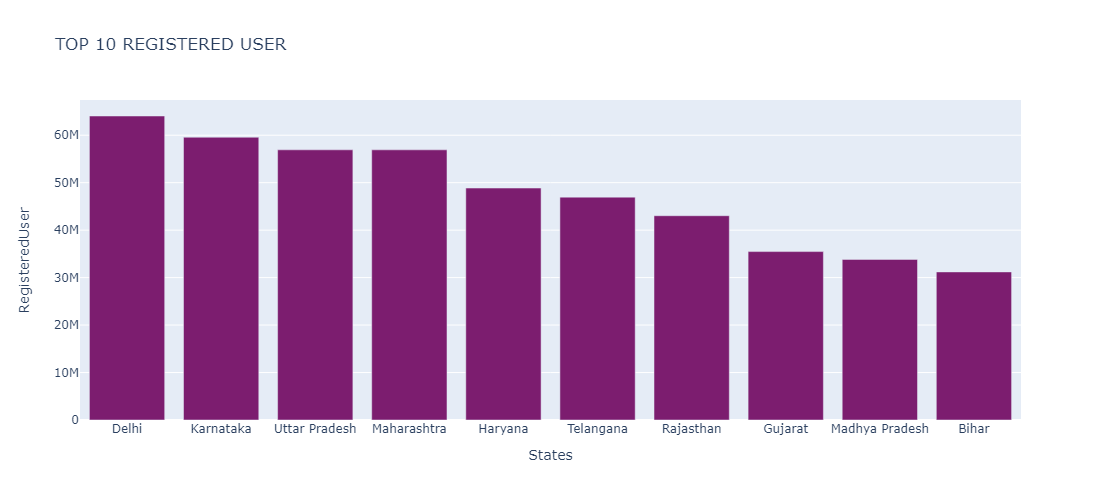

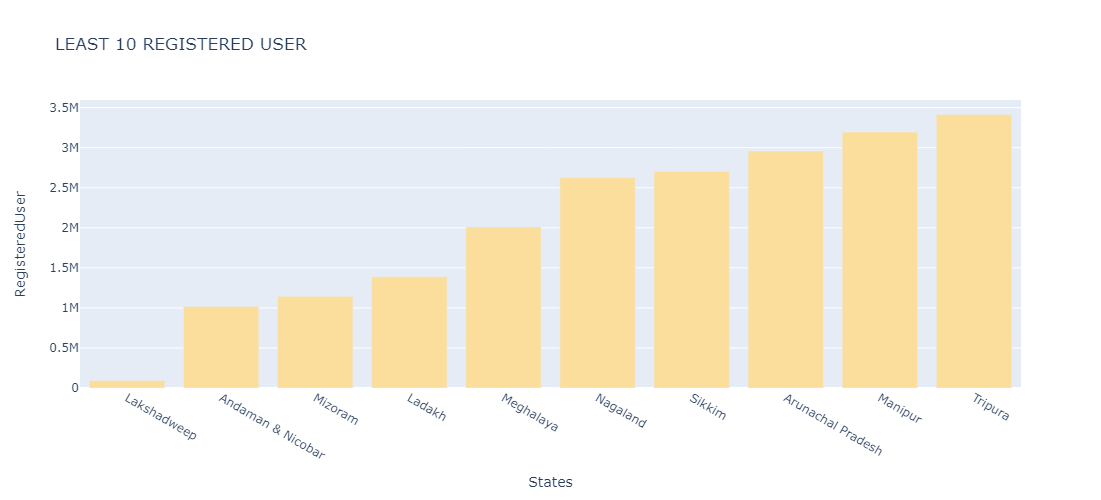

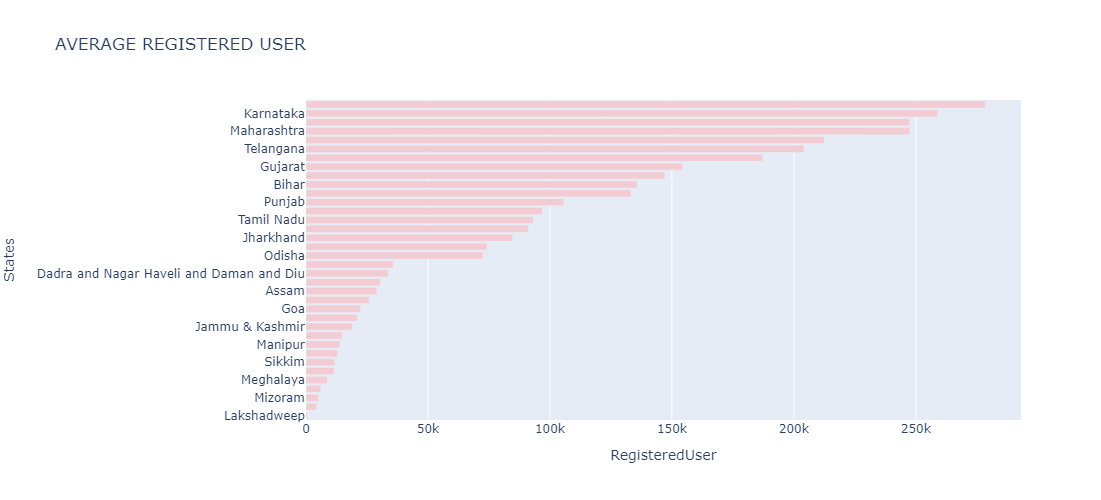

In [74]:
top_chart_registered_user1("top_user")

In [ ]:
top_chart_app_opens("map_user", "Tamil Nadu")

In [ ]:
Aggregated_insurance[Aggregated_insurance["Years"] == 2021]

In [ ]:
def Transaction_amount_count_Y(year):
    trans = Aggregated_insurance[Aggregated_insurance["Years"] == year]
    trans.reset_index(drop = True,inplace = True)
    
    trans_group = trans.groupby("States")[["Transaction_count","Transaction_amount"]].sum()
    trans_group.reset_index(inplace = True)
    
    fig_amount = px.bar(trans_group,x='States',y='Transaction_amount',title=f'{year} TRANSACTION AMOUNT',color_discrete_sequence=px.colors.sequential.Sunsetdark_r,height=1000)
    fig_amount.show()
    
    fig_count = px.bar(trans_group,x='States',y='Transaction_count',title=f'{year} TRANSACTION COUNT',height=1000)
    fig_count.show()

In [ ]:
#Transaction year wise
def Transaction_amount_count_Y(df, year):
    trans = df[df["Years"] == year]
    trans.reset_index(drop = True,inplace = True)
    
    trans_group = trans.groupby("States")[["Transaction_count","Transaction_amount"]].sum()
    trans_group.reset_index(inplace = True)
    
    fig_amount = px.bar(trans_group,x='States',y='Transaction_amount',title=f'{year} TRANSACTION AMOUNT',color_discrete_sequence=px.colors.sequential.Sunsetdark_r,height=1000)
    fig_amount.show()
    
    fig_count = px.bar(trans_group,x='States',y='Transaction_count',title=f'{year} TRANSACTION COUNT',height=1000)
    fig_count.show()
    
    url = "https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson"
    response = requests.get(url)
    data1 = json.loads(response.content)
    states_name = []
    for feature in data1["features"]:
        states_name.append(feature["properties"]["ST_NM"])
    
    states_name.sort()
    fig_india_1 = px.choropleth(trans_group, geojson = data1, locations = "States", featureidkey = "properties.ST_NM",
                               color = "Transaction_amount", color_continuous_scale = "Rainbow",
                               range_color = (trans_group["Transaction_amount"].min(), trans_group["Transaction_amount"].max()),
                               hover_name = "States", title = f"{year} TRANSACTION AMOUNT", fitbounds = "locations",
                               height = 600, width = 600)
    fig_india_1.update_geos(visible = False)
    fig_india_1.show()

    fig_india_2 = px.choropleth(trans_group, geojson = data1, locations = "States", featureidkey = "properties.ST_NM",
                               color = "Transaction_count", color_continuous_scale = "Rainbow",
                               range_color = (trans_group["Transaction_count"].min(), trans_group["Transaction_count"].max()),
                               hover_name = "States", title = f"{year} TRANSACTION COUNT", fitbounds = "locations",
                               height = 600, width = 600)
    fig_india_2.update_geos(visible = False)
    fig_india_2.show()

    return trans

#trans_group


In [ ]:
#Transaction Quarter wise
def Transaction_amount_count_Y_Q(df, quarter):
    trans = df[df["Quarter"] == quarter]
    trans.reset_index(drop = True,inplace = True)
    
    trans_group = trans.groupby("States")[["Transaction_count","Transaction_amount"]].sum()
    trans_group.reset_index(inplace = True)
    
    fig_amount = px.bar(trans_group,x='States',y='Transaction_amount',title=f'{trans_y["Years"].min()} QUARTER {quarter} TRANSACTION AMOUNT',color_discrete_sequence=px.colors.sequential.Sunsetdark_r,height=1000)
    fig_amount.show()
    
    fig_count = px.bar(trans_group,x='States',y='Transaction_count',title=f'{trans_y["Years"].min()} QUARTER {quarter} TRANSACTION COUNT',height=1000)
    fig_count.show()
    
    url = "https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson"
    response = requests.get(url)
    data1 = json.loads(response.content)
    states_name = []
    for feature in data1["features"]:
        states_name.append(feature["properties"]["ST_NM"])
    
    states_name.sort()
    fig_india_1 = px.choropleth(trans_group, geojson = data1, locations = "States", featureidkey = "properties.ST_NM",
                               color = "Transaction_amount", color_continuous_scale = "Rainbow",
                               range_color = (trans_group["Transaction_amount"].min(), trans_group["Transaction_amount"].max()),
                               hover_name = "States", title = f"{trans_y["Years"].min()} QUARTER {quarter} TRANSACTION AMOUNT", fitbounds = "locations",
                               height = 600, width = 600)
    fig_india_1.update_geos(visible = False)
    fig_india_1.show()

    fig_india_2 = px.choropleth(trans_group, geojson = data1, locations = "States", featureidkey = "properties.ST_NM",
                               color = "Transaction_count", color_continuous_scale = "Rainbow",
                               range_color = (trans_group["Transaction_count"].min(), trans_group["Transaction_count"].max()),
                               hover_name = "States", title = f"{trans_y["Years"].min()} QUARTER {quarter} TRANSACTION COUNT", fitbounds = "locations",
                               height = 600, width = 600)
    fig_india_2.update_geos(visible = False)
    fig_india_2.show()

    return trans

In [ ]:
#Transaction type
def aggr_trans_Transaction_type(df,state):

    trans = df[df["States"] == state]
    trans.reset_index(drop = True,inplace = True)
    #trans
    trans_group = trans.groupby("Transaction_type")[["Transaction_count","Transaction_amount"]].sum()
    trans_group.reset_index(inplace = True)
    #trans_group
    
    fig_pie1 = px.pie(data_frame = trans_group, names="Transaction_type", values= "Transaction_amount",
                      width = 600, title= f"{state.upper()} TRANSACTION AMOUNT")
    fig_pie1.show()
    
    fig_pie2 = px.pie(data_frame = trans_group, names="Transaction_type", values= "Transaction_count",
                      width = 600, title= f"{state.upper()} TRANSACTION COUNT")
    fig_pie2.show()

In [ ]:
#Aggregated user analysis1
def Aggre_user_plot1(df,year):

    aguy = df[df["Years"] == year]
    aguy.reset_index(drop = True, inplace = True)
    aguyg = pd.DataFrame(aguy.groupby("Brands")["Transaction_count"].sum())
    aguyg.reset_index( inplace = True)
    
    fig_bar1 = px.bar(aguyg, x = "Brands", y = "Transaction_count", title = f"{year} BRANDS AND TRANSACTION COUNT",
                      width = 600, color_discrete_sequence=px.colors.sequential.haline_r, hover_name = "Brands")
    fig_bar1.show()

    return aguy

In [ ]:
#Aggregated user analysis 2
def Aggre_user_plot2(df,quarter):
    aguyq = df[df["Quarter"] == quarter]
    aguyq.reset_index(drop = True, inplace = True)
    
    aguyqg = pd.DataFrame(aguyq.groupby("Brands")["Transaction_count"].sum())
    aguyqg.reset_index( inplace = True)
    
    fig_bar1 = px.bar(aguyqg, x = "Brands", y = "Transaction_count", title = f"Quarter- {quarter}, BRANDS AND TRANSACTION COUNT",
                          width = 600, color_discrete_sequence=px.colors.sequential.haline_r, hover_name = "Brands")
    fig_bar1.show()

    return aguyq

In [ ]:
#Aggregated user analysis 3
def Aggre_user_plot3(df,state):
    aguyqs = Aggre_user_y_q[Aggre_user_y_q["States"] == state]
    aguyqs.reset_index(drop= True, inplace = True)
    
    aguyqsg = aguyqs.groupby("Brands")[["Transaction_count", "Percentage"]].sum()
    aguyqsg.reset_index(inplace=True)
    
    fig_line_1 = px.line(aguyqsg, x ="Brands", y ="Transaction_count", hover_data = "Percentage",
                         title = f"{state.upper()}- BRANDS, TRANSACTION_COUNT, PERCENTAGE", width = 800, markers = True)
    fig_line_1.show()

In [ ]:
#Map Insurance Districts
def Map_insur_District(df,state):

    trans = df[df["States"] == state]
    trans.reset_index(drop = True,inplace = True)
    #trans
    trans_group = trans.groupby("District")[["Transaction_count","Transaction_amount"]].sum()
    trans_group.reset_index(inplace = True)
    #trans_group
    
    fig_bar1 = px.bar(trans_group, x= "Transaction_amount", y= "District", orientation = "h", title = f"{state.upper()} DISTRICT AND TRANSACTION AMOUNT",
                      color_discrete_sequence = px.colors.sequential.Mint_r)
    fig_bar1.show()
    
    fig_bar2 = px.bar(trans_group, x= "Transaction_count", y= "District", orientation = "h", title = f"{state.upper()} DISTRICT AND TRANSACTION COUNT",
                      color_discrete_sequence = px.colors.sequential.Bluered_r)
    fig_bar2.show()

In [ ]:
# Map user plot 1
def map_user_plot1(df,year):
    muy = df[df["Years"] == year]
    muy.reset_index(drop = True, inplace = True)
    #muy
    muyg = muy.groupby("States")[["RegisteredUser","AppOpens"]].sum()
    muyg.reset_index( inplace = True)
    
    fig_line_1 = px.line(muyg, x ="States", y =["RegisteredUser", "AppOpens"], 
                             title = f"{year} REGISTERED_USER AND APP_OPENS", width = 800,height = 600, markers = True)
    fig_line_1.show()

    return muy

In [ ]:
# Map user plot 2
def map_user_plot2(df,quarter):
    muyq = df[df["Quarter"] == quarter]
    muyq.reset_index(drop = True, inplace = True)
    #muyq
    muyqg = muyq.groupby("States")[["RegisteredUser","AppOpens"]].sum()
    muyqg.reset_index( inplace = True)
    
    fig_line_1 = px.line(muyqg, x ="States", y =["RegisteredUser", "AppOpens"], 
                             title = f"QUARTER-{quarter} REGISTERED_USER AND APP_OPENS", width = 800,height = 600, markers = True)
    fig_line_1.show()

    return muyq

In [ ]:
# Map user plot 3
def map_user_plot3(df,states):
    muyqs = df[df["States"] == states]
    muyqs.reset_index(drop = True, inplace = True)
    muyqs
    
    fig_map_user_bar1 = px.bar(muyqs, x= "RegisteredUser", y = "District", orientation = "h",
                               title = "REGISTERED USER")
    fig_map_user_bar1.show()
    fig_map_user_bar2 = px.bar(muyqs, x= "AppOpens", y = "District", orientation = "h",
                               title = "APP OPENS")
    fig_map_user_bar2.show()

In [ ]:
# Top Insurance plot 1
def top_insurance_plot1(df,state):
    tiy = df[df["States"] == state]
    tiy.reset_index(drop = True, inplace = True)
        
    fig_top_insur_bar1 = px.bar(tiy, x= "Quarter", y = "Transaction_amount", hover_data = "Pincodes", title = "TRANSACTION AMOUNT")
    fig_top_insur_bar1.show()

    fig_top_insur_bar2 = px.bar(tiy, x= "Quarter", y = "Transaction_count", hover_data = "Pincodes", title = "TRANSACTION COUNT")
    fig_top_insur_bar2.show()

In [ ]:
# Top User plot1
def top_user_plot1(df,year):
    tuy = df[df["Years"] == year]
    tuy.reset_index(drop = True, inplace = True)
    
    tuyg = pd.DataFrame(tuy.groupby(["States", "Quarter"])["RegisteredUser"].sum())
    tuyg.reset_index( inplace = True)
    
    
    fig_top_plot1 = px.bar(tuyg, x = "States", y= "RegisteredUser", color = "Quarter", width = 1000, height = 800,
                           color_discrete_sequence= px.colors.sequential.Rainbow_r, hover_name = "States", title = f"{year} REGISTERED USER")
    fig_top_plot1.show()

    return tuy

In [ ]:
#Top user plot 2
def top_user_plot2(df,state):
    tuys = df[df["States"] == state]
    tuys.reset_index(drop = True, inplace = True)
    
    fig_top_plot2 = px.bar(tuys, x = "Quarter", y = "RegisteredUser", title = f"{state.upper()} REGISTERED USER , PINCODE & QUARTER",
                           width = 800, height = 1000, color = "RegisteredUser", hover_data = "Pincodes",
                           color_continuous_scale = px.colors.sequential.Magenta)
    fig_top_plot2.show()

In [ ]:
#Aggregated insurance
trans_y = Transaction_amount_count_Y(Aggregated_insurance, 2023)

In [ ]:
Transaction_amount_count_Y_Q(trans_y,2)

In [ ]:
#Aggregated Transaction
Aggr_trans_trans_y = Transaction_amount_count_Y(Aggregated_transaction, 2023)

In [ ]:
aggr_trans_Transaction_type(Aggr_trans_trans_y,"Tamil Nadu")

In [ ]:
Aggr_trans_trans_y_Q = Transaction_amount_count_Y_Q(Aggr_trans_trans_y,3)

In [ ]:
aggr_trans_Transaction_type(Aggr_trans_trans_y_Q,"Tamil Nadu")

In [ ]:
#Aggregated user
Aggregated_user

In [ ]:
Aggre_user_y = Aggre_user_plot1(Aggregated_user,2020)

In [ ]:
Aggre_user_y_q = Aggre_user_plot2(Aggre_user_y,3)

In [ ]:
Aggre_user_plot3(Aggre_user_y_q,"Delhi")

In [ ]:
###Map Insurance

In [ ]:
Map_insur_tac_y = Transaction_amount_count_Y(Map_insurance, 2023)

In [ ]:
Map_insur_District(Map_insur_tac_y,"Tamil Nadu")

In [ ]:
Map_insur_tac_y_Q = Transaction_amount_count_Y_Q(Map_insur_tac_y,3)

In [ ]:
Map_insur_District(Map_insur_tac_y_Q,"Tamil Nadu")

In [ ]:
Map_insurance

In [ ]:
#Map Transaction

In [ ]:
Map_trans_tac_y = Transaction_amount_count_Y(Map_transaction, 2023)

In [ ]:
Map_insur_District(Map_trans_tac_y,"Tamil Nadu")

In [ ]:
Map_trans_tac_y_Q = Transaction_amount_count_Y_Q(Map_trans_tac_y,3)

In [ ]:
Map_insur_District(Map_trans_tac_y_Q,"Tamil Nadu")

In [ ]:
Map_transaction

In [ ]:
#Map User

In [ ]:
map_user_Y = map_user_plot1(Map_user,2020)

In [ ]:
map_user_Y_Q = map_user_plot2(map_user_Y,2)

In [ ]:
map_user_plot3(map_user_Y_Q,"West Bengal")

In [ ]:
Map_user

In [ ]:
# Top Insurance

In [ ]:
Top_insur_tac_y = Transaction_amount_count_Y(Top_insurance, 2023)

In [ ]:
top_insurance_plot1(Top_insur_tac_y,"West Bengal")

In [ ]:
Top_insur_tac_y_Q = Transaction_amount_count_Y_Q(Top_insur_tac_y,3)

In [ ]:
#Top Transaction

In [ ]:
Top_tran_tac_y = Transaction_amount_count_Y(Top_transaction, 2023)

In [ ]:
top_insurance_plot1(Top_tran_tac_y,"West Bengal")

In [ ]:
Top_tran_tac_y_Q = Transaction_amount_count_Y_Q(Top_tran_tac_y,3)

In [ ]:
# Top User

In [ ]:
top_user_Y = top_user_plot1(Top_user,2021)

In [ ]:
top_user_plot2(top_user_Y,"Tamil Nadu")

In [ ]:
Top_user